In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6,5)
mpl.rcParams['font.size'] = 22
from IPython.display import Audio, Markdown, Image, HTML
display(HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
"""))

import numpy as np
import pandas as pd
import wget
from urllib.request import Request, urlopen
import json

In [2]:
# Instalación de algunos paquetes
# !pip install ipyleaflet geopandas pyproj shapely
# !jupyter nbextension enable --py --sys-prefix ipyleaflet 

In [92]:
from ipyleaflet import Map, GeoJSON, Marker, Heatmap
import geopandas as gpd
from pyproj import CRS
from shapely.geometry import Point

# Sistemas de información geográfica (SIG) o Geographic Information Systems (GIS)

## Representaciones 

**Geoide**: superficie con igual campo de gravedad sobre la Tierra

Geoide a partir de anomalías del campo gravitatorio
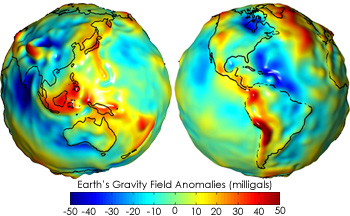

**Elipsoide**: superficie geométrica que aproxima al geoide
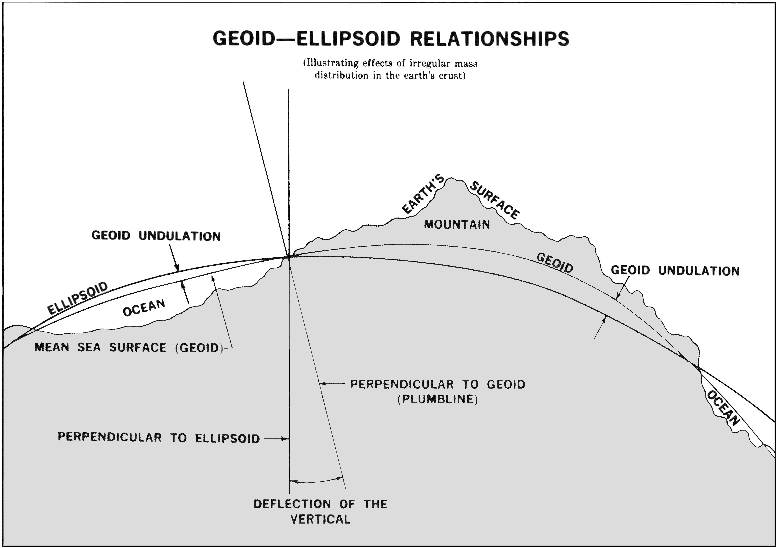

## Proyecciones

https://map-projections.net/singleview.php

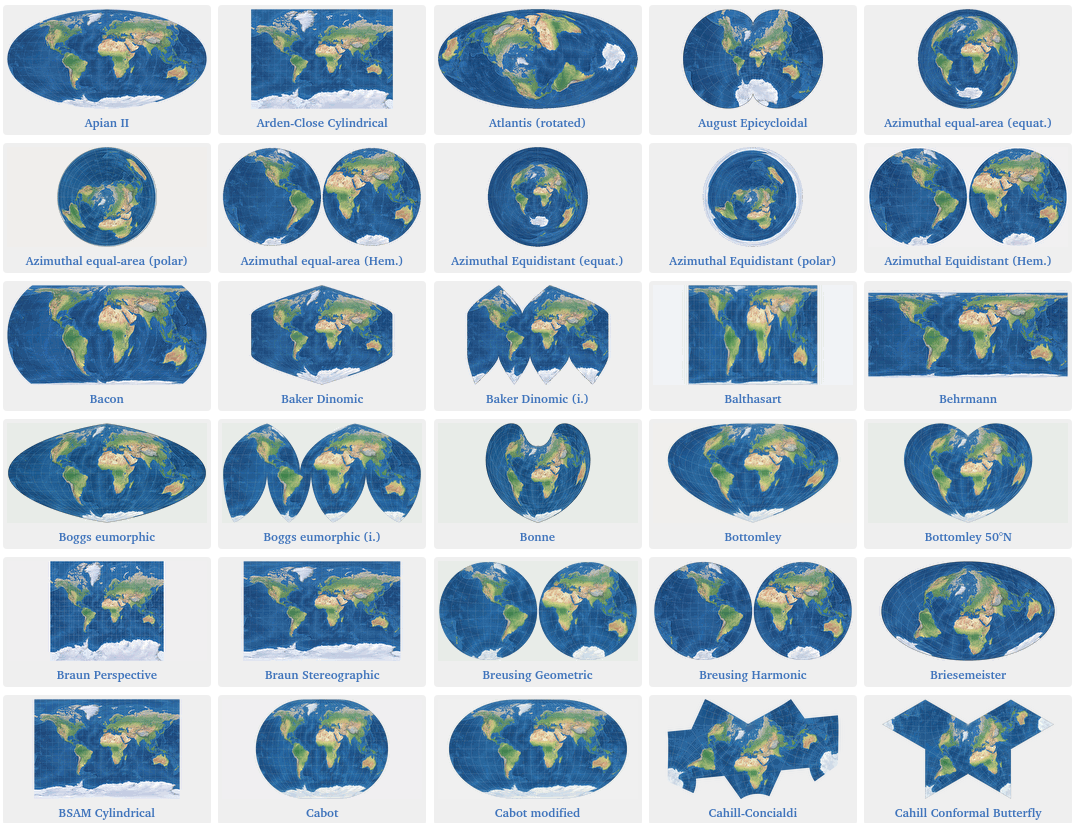

# Tipos de archivos y datos

Archivos:

- GeoJSON
- shapefile

Datos espaciales:

- Vectoriales: puntos, líneas, polígonos
- Rasters: pixels, grillas


# Consultas sobre datos espaciales:

- Distancia
- Igual
- Cruza
- Largo
- Disjunto
- Superpone
- Area
- Intersecta 
- Contiene
- Centroide 
- Toca

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


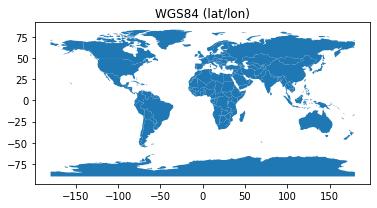

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
display(world.head())
ax = world.plot()
ax.set_title("WGS84 (lat/lon)");

In [5]:
world.crs

{'init': 'epsg:4326'}

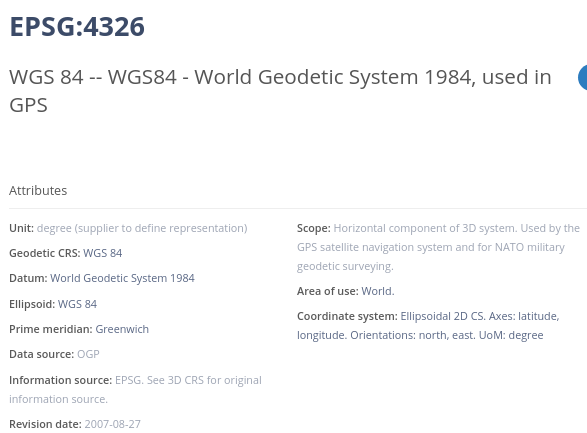

Transformamos a Mercator

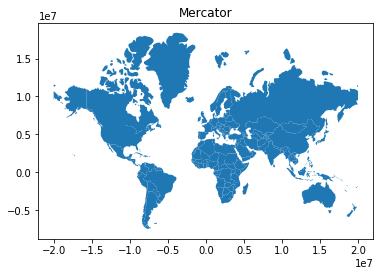

In [6]:
world = world[(world.name != "Antarctica") {'init': 'epsg:3395'}& (world.name != "Fr. S. Antarctic Lands")]
world = world.to_crs() # world.to_crs(epsg=3395) 
ax = world.plot()
ax.set_title("Mercator");

In [7]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((20037508.343 -1800679.237, 200..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3774143.866 -105050.440, 3792946.708..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-964649.018 3185897.152, -964597.245..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-13674486.249 6242596.000, -13..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-13674486.249 6242596.000, -13..."


# Datos georeferenciados nacionales

https://mapa.idera.gob.ar/

http://catalogo.idera.gob.ar/geonetwork/srv/spa/catalog.search#/home

https://usig.buenosaires.gob.ar/

http://mapa.educacion.gob.ar/mapa-interactivo

https://data.buenosaires.gob.ar/dataset

http://www.geointa.inta.gob.ar/

# Dependencias culturales de CABA

Bajamos los datos

In [33]:
# CSV con dependencias culturales
wget.download('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/dependencias-culturales/dependencias-culturales.csv')

# GeoJson con dependencias culturales
wget.download('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/dependencias-culturales/dependencias-culturales.geojson');

# GeoJson de barrios
wget.download('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson');

# Shapefile de barrios
wget.download('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios-zip.zip');
!unzip -qo barrios-zip.zip -d barrios_badata

Primero veamos los dataset de barrios. Hay uno en formato GeoJSON y otro en formato shapefile.

In [9]:
barrios_geojson = gpd.read_file('barrios.geojson')
barrios_geojson.head()

,barrio,comuna,perimetro,area,geometry
0,CHACARITA,15,7724.852955,3.115707e+06,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5..."
1,PATERNAL,15,7087.513295,2.229829e+06,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5..."
2,VILLA CRESPO,15,8131.857075,3.615978e+06,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5..."
3,VILLA DEL PARQUE,11,7705.389797,3.399596e+06,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6..."
4,ALMAGRO,5,8537.901368,4.050752e+06,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."


In [10]:
barrios_shapes = gpd.read_file('barrios_badata')
display(barrios_shapes.head())

,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"POLYGON ((100961.338 103691.974, 100884.721 10..."
1,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO,"POLYGON ((99791.104 103628.888, 99787.132 1036..."
2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO,"POLYGON ((103627.714 103487.358, 103517.533 10..."
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO,"POLYGON ((97128.440 101597.513, 97112.315 1015..."
4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO,"POLYGON ((104625.143 101679.935, 104629.994 10..."


Se puede ver que están en distintos sistemas de coordenadas. El shapefile está en Gauss Kruger GKBA en metros y el geojson en el sistema WSG84 lat/long.

https://recursos-data.buenosaires.gob.ar/ckan2/proyecciones-gkba.pdf

https://spatialreference.org/ref/sr-org/gauss-kruger-buenos-aires-reproyectado/

In [11]:
display(barrios_shapes.crs)

display(barrios_geojson.crs)

{'proj': 'tmerc',
 'lat_0': -34.6297166,
 'lon_0': -58.4627,
 'k': 0.999998,
 'x_0': 100000,
 'y_0': 100000,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}

{'init': 'epsg:4326'}

In [12]:
display(CRS(barrios_shapes.crs))

display(CRS(barrios_geojson.crs))

<Projected CRS: +proj=tmerc +lat_0=-34.6297166 +lon_0=-58.4627 +k= ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: Unknown based on International 1909 (Hayford) ellipsoid
- Ellipsoid: International 1909 (Hayford)
- Prime Meridian: Greenwich

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Si quisiéramos poder graficar los dos conjuntos de datos en simultáneo hay que pasar alguno al sistema del otro. Pasemos el shapefile a WSG84 lat/long

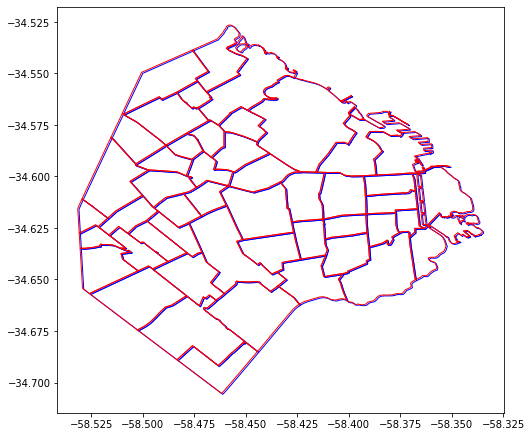

In [13]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
barrios_shapes.to_crs({'init': 'epsg:4326'}).boundary.plot(color=None,edgecolor='b',linewidth = 1,ax=ax)
barrios_geojson.boundary.plot(color=None,edgecolor='r',linewidth = 1,ax=ax);

El gráfico no es perfecto, posiblemente tenga cientos de metros de error. Pasemos el geojson al sistema del shapefile con el siguiente codigo

In [ ]:
# no anda
proj4 = CRS(barrios_shapes.crs).to_string()
print(proj4)
# anda
proj4 = '+proj=tmerc +lat_0=-34.629269 +lon_0=-58.4633 +k=0.9999980000000001 +x_0=100000 +y_0=100000 +ellps=intl +units=m +no_defs'

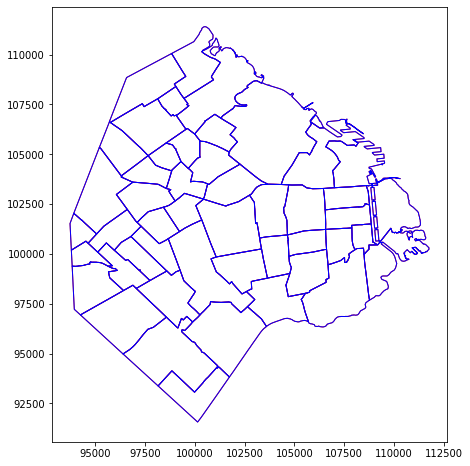

In [15]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
barrios_geojson.to_crs(proj4).boundary.plot(color=None,edgecolor='r',linewidth = 1,ax=ax);
barrios_shapes.boundary.plot(color=None,edgecolor='b',linewidth = 1,ax=ax)

Sigamos con los datos de las dependencias culturales.

In [16]:
df = pd.read_csv('dependencias-culturales.csv',sep=';')
df

,LAT,LNG,ID,NOMBRE,CALLE,ALTURA,PISO_DEPTO,DIRECCION_NORMALIZADA,BARRIO,COMUNA,...,CPA,DIAS_Y_HORARIO,TELEFONOS,EMAIL,WEB,ACTIVIDAD,OTRAS_ACTIDADES,DEPENDENCIA,PUBLICO,SECTOR
0,-34.609173,-58.384297,192,36 BILLARES,DE MAYO AV.,1265,NaN,DE MAYO AV. 1265,MONSERRAT,COMUNA 01,...,C1085ABC,NaN,4381-5696,INFO@LOS36BILLARES.COM.AR,WWW.LOS36BILLARES.COM.AR,BAR NOTABLE,NaN,NaN,GENERAL,PRIVADO
1,-34.596817,-58.383559,1467,ABM,"ALVEAR, MARCELO T. DE",1155,NaN,"ALVEAR, MARCELO T. DE 1155",RETIRO,COMUNA 01,...,C1058AAQ,LUNES A VIERNES DE 9 A 22,4816-1314 / 1644,INFO@ABM.EDU.AR,WWW.ABM.EDU.AR,ESPACIO DE FORMACION (SEMINARIOS Y TALLERES),NaN,NaN,GENERAL,PRIVADO
2,-34.609848,-58.370739,1788,ACADEMIA NACIONAL DE LA HISTORIA DE LA REPUBLI...,BALCARCE,139,NaN,BALCARCE 139,MONSERRAT,COMUNA 01,...,C1064AAC,NaN,343-4416 // 4331-4633 // 4331-5147,NaN,WWW.AN-HISTORIA.ORG.AR,MUSEO,NaN,NaN,GENERAL,ONG
3,-34.618628,-58.385471,296,ACADEMIA PORTEÑA DEL LUNFARDO,ESTADOS UNIDOS,1379,NaN,ESTADOS UNIDOS 1379,CONSTITUCION,COMUNA 01,...,C1101ABA,LUNES A VIERNES DE 14:00 A 19:00,4383-2393,OLIVIERIEDITOR@HOTMAIL.COM,HTTP://WWW.TODOTANGO.COM/ALUNFARDO/,ESPACIO DE FORMACION (SEMINARIOS Y TALLERES),NaN,NaN,GENERAL,ONG
4,-34.611321,-58.372772,1147,ACCION,MORENO,457,NaN,MORENO 457,MONSERRAT,COMUNA 01,...,C1091AAI,NaN,4343-6474,NaN,NaN,LIBRERIA,NaN,NaN,GENERAL,PRIVADO
5,-34.623643,-58.378418,1714,ACERCANDONOS MOVIMIENTO CULTURAL,COCHABAMBA,894,NaN,COCHABAMBA 894,CONSTITUCION,COMUNA 01,...,C1150AAN,NaN,4300-9506 // 6088-4426,ACERCANDONOSMOVIMIENTOCULTURAL@GMAIL.COM,WWW.ACERCANDONOSCULTURA.COM.AR,EDITORIAL,NaN,NaN,GENERAL,PRIVADO
6,-34.605459,-58.379310,1148,ACME AGENCY. CASA CENTRAL.,SUIPACHA,245,PISO 1,SUIPACHA 245,SAN NICOLAS,COMUNA 01,...,C1008AAE,NaN,4328-1662,ACME@REDYNET.COM.AR,NaN,LIBRERIA,NaN,NaN,GENERAL,PRIVADO
7,-34.594071,-58.379797,1813,ACME AGENCY. SUCURSAL ARENALES.,ARENALES,885,NaN,ARENALES 885,RETIRO,COMUNA 01,...,C1061AAC,NaN,4393-8830,ACME@REDYNET.COM.AR,NaN,LIBRERIA,NaN,NaN,GENERAL,PRIVADO
8,-34.618535,-58.373139,2165,ACONCAGUA,ESTADOS UNIDOS,502,NaN,ESTADOS UNIDOS 502,SAN TELMO,COMUNA 01,...,C1101AAL,NaN,NaN,NaN,NaN,BAR IDENTIFICADO,NaN,NaN,NaN,NaN
9,-34.604504,-58.392074,797,ACQUA RECORDS,CORRIENTES AV.,1792,NaN,CORRIENTES AV. 1792,SAN NICOLAS,COMUNA 01,...,C1042AAQ,NaN,"4371-6978, INTERNO 131",INFO@ACQUA-RECORDS.COM,HTTP://WWW.ACQUA-RECORDS.COM/,SELLO DISCOGRAFICO,NaN,NaN,GENERAL,PRIVADO


Tablas (geojson) con información de geometrías

In [17]:
dc_geojson = gpd.read_file('dependencias-culturales.geojson')
dc_geojson[['LAT','LNG','geometry']].head()

,LAT,LNG,geometry
0,-34.609173,-58.384297,POINT (-58.38430 -34.60917)
1,-34.596817,-58.383559,POINT (-58.38356 -34.59682)
2,-34.609848,-58.370739,POINT (-58.37074 -34.60985)
3,-34.618628,-58.385471,POINT (-58.38547 -34.61863)
4,-34.611321,-58.372772,POINT (-58.37277 -34.61132)


Primero chequeamos las proyecciones de los puntos con los barrios para que sean las mismas.

In [18]:
barrios_geojson.crs, dc_geojson.crs

({'init': 'epsg:4326'}, {'init': 'epsg:4326'})

Graficamos los puntos sobre los polígonos

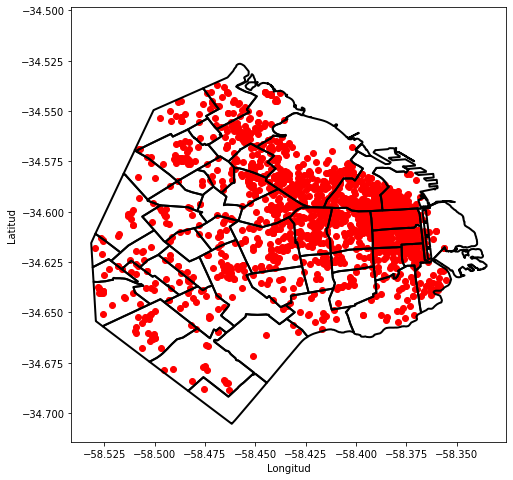

In [19]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
barrios_geojson.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax) 
dc_geojson.plot(ax= ax, color='r');
plt.axis('square');
plt.xlabel('Longitud')
plt.ylabel('Latitud');

Ahora queremos contar cuantos puntos hay en cada barrio. acemos un join para incluir en el set de datos de puntos las columnas del set de dato de polígonos

In [20]:
join = gpd.sjoin(dc_geojson, barrios_geojson, how='left', op= 'within')
join

,LAT,LNG,ID,NOMBRE,CALLE,ALTURA,PISO_DEPTO,DIRECCION_NORMALIZADA,BARRIO,COMUNA,...,OTRAS_ACTIDADES,DEPENDENCIA,PUBLICO,SECTOR,geometry,index_right,barrio,comuna,perimetro,area
0,-34.609173,-58.384297,192,36 BILLARES,DE MAYO AV.,1265,,DE MAYO AV. 1265,MONSERRAT,COMUNA 01,...,,,GENERAL,PRIVADO,POINT (-58.38430 -34.60917),41,MONSERRAT,1,6739.222311,2.198622e+06
1,-34.596817,-58.383559,1467,ABM,"ALVEAR, MARCELO T. DE",1155,,"ALVEAR, MARCELO T. DE 1155",RETIRO,COMUNA 01,...,,,GENERAL,PRIVADO,POINT (-58.38356 -34.59682),45,RETIRO,1,18837.988687,4.512711e+06
2,-34.609848,-58.370739,1788,ACADEMIA NACIONAL DE LA HISTORIA DE LA REPUBLI...,BALCARCE,139,,BALCARCE 139,MONSERRAT,COMUNA 01,...,,,GENERAL,ONG,POINT (-58.37074 -34.60985),41,MONSERRAT,1,6739.222311,2.198622e+06
3,-34.618628,-58.385471,296,ACADEMIA PORTEÑA DEL LUNFARDO,ESTADOS UNIDOS,1379,,ESTADOS UNIDOS 1379,CONSTITUCION,COMUNA 01,...,,,GENERAL,ONG,POINT (-58.38547 -34.61863),11,CONSTITUCION,1,6326.841375,2.101995e+06
4,-34.611321,-58.372772,1147,ACCION,MORENO,457,,MORENO 457,MONSERRAT,COMUNA 01,...,,,GENERAL,PRIVADO,POINT (-58.37277 -34.61132),41,MONSERRAT,1,6739.222311,2.198622e+06
5,-34.623643,-58.378418,1714,ACERCANDONOS MOVIMIENTO CULTURAL,COCHABAMBA,894,,COCHABAMBA 894,CONSTITUCION,COMUNA 01,...,,,GENERAL,PRIVADO,POINT (-58.37842 -34.62364),11,CONSTITUCION,1,6326.841375,2.101995e+06
6,-34.605459,-58.379310,1148,ACME AGENCY. CASA CENTRAL.,SUIPACHA,245,PISO 1,SUIPACHA 245,SAN NICOLAS,COMUNA 01,...,,,GENERAL,PRIVADO,POINT (-58.37931 -34.60546),42,SAN NICOLAS,1,6548.084754,2.289008e+06
7,-34.594071,-58.379797,1813,ACME AGENCY. SUCURSAL ARENALES.,ARENALES,885,,ARENALES 885,RETIRO,COMUNA 01,...,,,GENERAL,PRIVADO,POINT (-58.37980 -34.59407),45,RETIRO,1,18837.988687,4.512711e+06
8,-34.618535,-58.373139,2165,ACONCAGUA,ESTADOS UNIDOS,502,,ESTADOS UNIDOS 502,SAN TELMO,COMUNA 01,...,,,,None,POINT (-58.37314 -34.61853),19,SAN TELMO,1,5178.032839,1.232270e+06
9,-34.604504,-58.392074,797,ACQUA RECORDS,CORRIENTES AV.,1792,,CORRIENTES AV. 1792,SAN NICOLAS,COMUNA 01,...,,,GENERAL,PRIVADO,POINT (-58.39207 -34.60450),42,SAN NICOLAS,1,6548.084754,2.289008e+06


Contamos las repeticiones de los barrios en la tabla

In [21]:
counts = join['BARRIO'].value_counts()
counts.name = 'dependencias_culturales'
counts

SAN NICOLAS          326
PALERMO              201
RECOLETA             175
BALVANERA            167
MONSERRAT            160
RETIRO               123
ALMAGRO               94
BELGRANO              83
SAN TELMO             81
CABALLITO             69
VILLA CRESPO          52
FLORES                39
CHACARITA             34
BARRACAS              34
CONSTITUCION          34
BOCA                  33
COLEGIALES            29
VILLA URQUIZA         29
BOEDO                 28
MATADEROS             26
NUÑEZ                 23
SAAVEDRA              20
PARQUE PATRICIOS      17
SAN CRISTOBAL         17
NUEVA POMPEYA         17
LINIERS               16
PUERTO MADERO         15
VILLA LUGANO          15
PARQUE AVELLANEDA     14
VILLA DEL PARQUE      13
VILLA GRAL. MITRE     12
VILLA DEVOTO          12
MONTE CASTRO          10
FLORESTA              10
PARQUE CHACABUCO      10
VILLA ORTUZAR          9
VELEZ SARSFIELD        8
VILLA LURO             7
AGRONOMIA              6
PARQUE CHAS            5


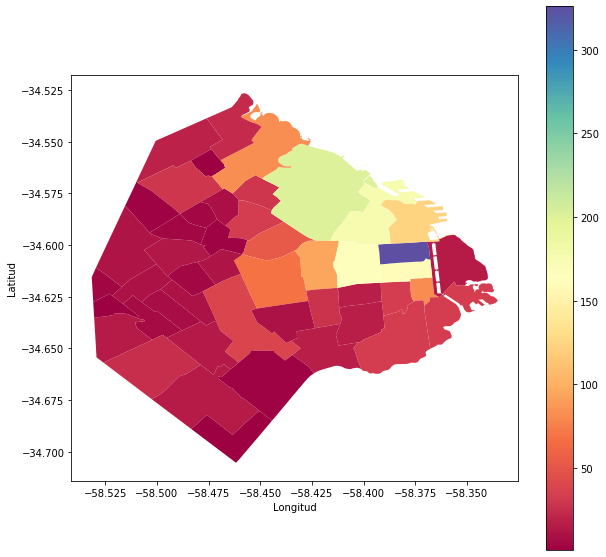

In [22]:
barrios_geojson.set_index('barrio').join(counts).plot(column = 'dependencias_culturales',legend=True, figsize=(10,10), cmap='Spectral');
plt.xlabel('Longitud')
plt.ylabel('Latitud');

Normalizamos la cantidad de dependencias por el área de cada barrio. El dataset ya viene con una columna area, pero la podemos re calcular. Para que de igual que la columna que viene en el dataset, hay que elegir la proyección correcta.

In [64]:
# mercator en metros
barrios_geojson['area_1'] = barrios_geojson.geometry.to_crs({'init': 'epsg:3395'}).area

# pseudomercator en metros (el que usa googlemap)
barrios_geojson['area_2'] = barrios_geojson.geometry.to_crs({'init': 'epsg:3857'}).area

# al Gauss Kruger BA
barrios_geojson['area_3'] = barrios_geojson.geometry.to_crs(proj4).area

barrios_geojson.filter(regex=("area_*")).head(4)

,area,area_1,area_2,area_3
0,3.115707e+06,4.587241e+06,4.608193e+06,3.115909e+06
1,2.229829e+06,3.283695e+06,3.298691e+06,2.229974e+06
2,3.615978e+06,5.325171e+06,5.349488e+06,3.616212e+06
3,3.399596e+06,5.007138e+06,5.030000e+06,3.399816e+06


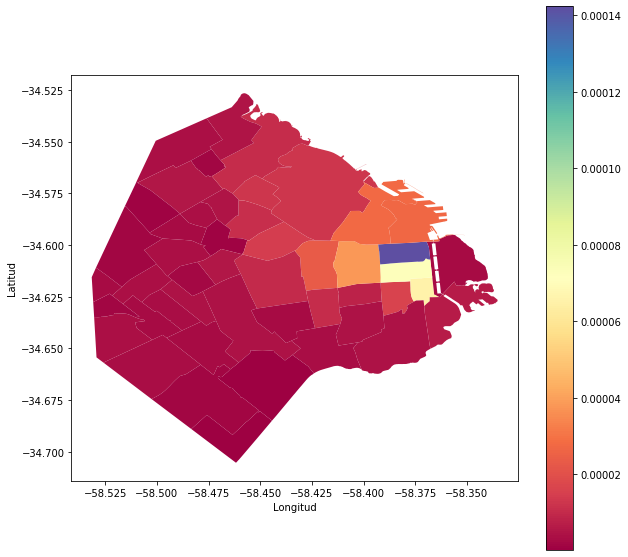

In [24]:
barrios_geojson_ = barrios_geojson.set_index('barrio').join(counts)
barrios_geojson_['dependencias_culturales'] = barrios_geojson_['dependencias_culturales']/barrios_geojson_['area']
barrios_geojson_.plot(column = 'dependencias_culturales',legend=True, figsize=(10,10), cmap='Spectral');
plt.xlabel('Longitud')
plt.ylabel('Latitud');

# Interactivo con ipyleaflet

Para bajar mapas con más información, hay que pasar la ubicación central y un zoom deseado

In [25]:
latmin = dc_geojson.LAT.min()
latmax = dc_geojson.LAT.max()
lngmin = dc_geojson.LNG.min()
lngmax = dc_geojson.LNG.max()
latmean = (latmax+latmin)/2
lngmean = (lngmin+lngmax)/2

In [169]:
m = Map(center=( latmean,lngmean ), zoom=11)

# hay que abrir el geojson de nuevo 
with open('dependencias-culturales.geojson') as fp:
    data = json.load(fp)
geo_json = GeoJSON(data=data)

m.add_layer(geo_json)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [167]:
m = Map(center=( latmean,lngmean ), zoom=11)
heatmap = Heatmap(
    locations=[(lat,lng,1) for i,(lat,lng) in dc_geojson[['LAT','LNG']].iterrows()],
    radius=20,
    blur=15,
    min_opacity = 0.3
)

m.add_layer(heatmap);
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

Una alternativa estática (smopy), pero hay que readaptar las coordenadas para dibujar los puntos encima

In [27]:
# tiles = smopy.Map(latmin, lngmin, latmax,  lngmax, z=12)
# ax = tiles.show_mpl(figsize=(12, 8), dpi=150)

## GeoCoding

Buscador de coordenadas a partir de una dirección

In [170]:
# Función que usa la api del GCBA para pasar direcciones a coordenadas
def gcbaAPIGeoCoding(calle=None, altura=None):
    if calle is not None and altura is not None:
        req = Request('https://ws.usig.buenosaires.gob.ar/geocoder/2.2/geocoding?cod_calle={calle}&altura={altura}'.format(calle=calle.replace(' ','%20'), altura=altura))
        req.add_header('access',"application/json")
        response = urlopen(req)
#         print(response.geturl())
        response = json.loads(response.read().decode('utf-8')[1:-1])
        if response=='ErrorCalleInexistente':
            raise Exception('ErrorCalleInexistente')
            
        req = Request('https://ws.usig.buenosaires.gob.ar/rest/convertir_coordenadas?x={x}&y={y}&output=lonlat'.format(**response))
        req.add_header('access',"application/json")
        response = urlopen(req)
#         print(response.geturl())
        coords = json.loads(response.read().decode('utf-8'))['resultado']
        coords = {k: float(v) for k, v in coords.items()}
        return coords

In [171]:
coords = gcbaAPIGeoCoding('Callao Av.',1)
print(coords)

{'x': -58.391875, 'y': -34.609039}


In [172]:
center = (coords['y'],coords['x'])
m = Map(center=center, zoom=18)
marker = Marker(location=center, draggable=False)
m.add_layer(marker)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

## A partir de datos del GPS del teléfono

In [90]:
center = (-34.5449492,-58.4393466)
m = Map(center=center, zoom=18)
marker = Marker(location=center, draggable=False)
m.add_layer(marker)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

Donde quedaría el punto si los datos obtenidos estuviesen en el sistema viejo argentino llamado "Campo Inchauspe" (epsg:4221). Para eso creamos un geodataframe con un punto y lo transformamos.

In [87]:
p = Point(-34.5449492,-58.4393466)
gdf = gpd.GeoDataFrame([{'geometry': p}])
display(gdf)
gdf.crs = {'init':'epsg:4326'}
gdf = gdf.to_crs({'init':'epsg:4221'})
display(gdf)
center = tuple(np.array(gdf.geometry[0]))

,geometry
0,POINT (-34.54495 -58.43935)


,geometry
0,POINT (-34.54543 -58.43898)


In [89]:
m = Map(center=center, zoom=18)
marker = Marker(location=center, draggable=False)
m.add_layer(marker)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …